# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [5]:
!pip install matplotlib --upgrade

    100% |████████████████████████████████| 12.6MB 58kB/s  eta 0:00:01
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 12.2MB 60kB/s  eta 0:00:01   74% |███████████████████████▊        | 9.0MB 58.9MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 771kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 1.6MB/s eta 0:00:01
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib)
    100% |████████████████████████████████| 215kB 3.3MB/s eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 573kB 1.3MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installati

In [6]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 509kB/s ta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


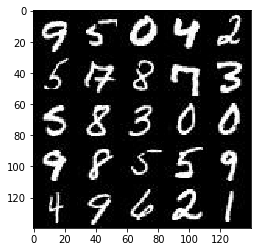

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

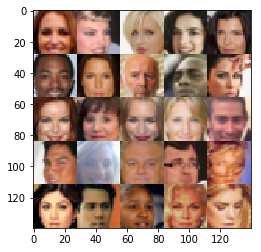

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, None, name='lr')
    
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [14]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [15]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, 1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7*7*256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [16]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * alpha))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [17]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                batch_images = batch_images * 2                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 1.3125... Generator Loss: 5.5718
Epoch 1/2... Batch 20... Discriminator Loss: 1.9311... Generator Loss: 8.3999
Epoch 1/2... Batch 30... Discriminator Loss: 0.7371... Generator Loss: 1.9480
Epoch 1/2... Batch 40... Discriminator Loss: 0.5767... Generator Loss: 2.2007
Epoch 1/2... Batch 50... Discriminator Loss: 2.1840... Generator Loss: 0.3861
Epoch 1/2... Batch 60... Discriminator Loss: 1.3369... Generator Loss: 0.7023
Epoch 1/2... Batch 70... Discriminator Loss: 1.3029... Generator Loss: 0.9473
Epoch 1/2... Batch 80... Discriminator Loss: 2.2873... Generator Loss: 0.2680
Epoch 1/2... Batch 90... Discriminator Loss: 1.8071... Generator Loss: 0.6213
Epoch 1/2... Batch 100... Discriminator Loss: 1.6051... Generator Loss: 0.4661


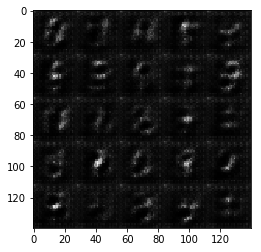

Epoch 1/2... Batch 110... Discriminator Loss: 1.4117... Generator Loss: 1.1698
Epoch 1/2... Batch 120... Discriminator Loss: 1.4489... Generator Loss: 0.9149
Epoch 1/2... Batch 130... Discriminator Loss: 1.5141... Generator Loss: 0.4699
Epoch 1/2... Batch 140... Discriminator Loss: 1.6543... Generator Loss: 0.4091
Epoch 1/2... Batch 150... Discriminator Loss: 2.2084... Generator Loss: 0.1966
Epoch 1/2... Batch 160... Discriminator Loss: 1.3988... Generator Loss: 1.3351
Epoch 1/2... Batch 170... Discriminator Loss: 2.0906... Generator Loss: 0.2303
Epoch 1/2... Batch 180... Discriminator Loss: 1.3193... Generator Loss: 0.7670
Epoch 1/2... Batch 190... Discriminator Loss: 1.5276... Generator Loss: 0.7981
Epoch 1/2... Batch 200... Discriminator Loss: 1.4763... Generator Loss: 0.7316


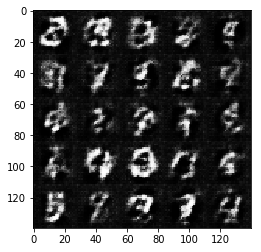

Epoch 1/2... Batch 210... Discriminator Loss: 1.8516... Generator Loss: 0.3227
Epoch 1/2... Batch 220... Discriminator Loss: 1.4877... Generator Loss: 1.3428
Epoch 1/2... Batch 230... Discriminator Loss: 1.3923... Generator Loss: 0.7734
Epoch 1/2... Batch 240... Discriminator Loss: 1.5158... Generator Loss: 0.6510
Epoch 1/2... Batch 250... Discriminator Loss: 1.9142... Generator Loss: 0.2666
Epoch 1/2... Batch 260... Discriminator Loss: 1.3199... Generator Loss: 0.6967
Epoch 1/2... Batch 270... Discriminator Loss: 1.8831... Generator Loss: 0.2955
Epoch 1/2... Batch 280... Discriminator Loss: 1.8692... Generator Loss: 0.2854
Epoch 1/2... Batch 290... Discriminator Loss: 1.2089... Generator Loss: 1.2159
Epoch 1/2... Batch 300... Discriminator Loss: 1.4650... Generator Loss: 0.5212


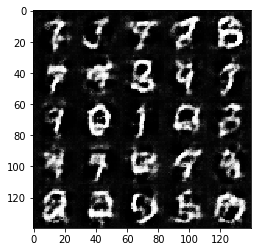

Epoch 1/2... Batch 310... Discriminator Loss: 1.4961... Generator Loss: 0.5059
Epoch 1/2... Batch 320... Discriminator Loss: 1.4875... Generator Loss: 0.4854
Epoch 1/2... Batch 330... Discriminator Loss: 1.4584... Generator Loss: 0.5185
Epoch 1/2... Batch 340... Discriminator Loss: 1.1296... Generator Loss: 1.1750
Epoch 1/2... Batch 350... Discriminator Loss: 1.1688... Generator Loss: 1.3331
Epoch 1/2... Batch 360... Discriminator Loss: 1.5207... Generator Loss: 0.4240
Epoch 1/2... Batch 370... Discriminator Loss: 1.4402... Generator Loss: 0.5576
Epoch 1/2... Batch 380... Discriminator Loss: 1.4761... Generator Loss: 0.5055
Epoch 1/2... Batch 390... Discriminator Loss: 1.3601... Generator Loss: 0.5887
Epoch 1/2... Batch 400... Discriminator Loss: 1.3586... Generator Loss: 0.8508


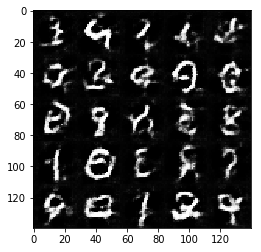

Epoch 1/2... Batch 410... Discriminator Loss: 1.2470... Generator Loss: 0.8349
Epoch 1/2... Batch 420... Discriminator Loss: 1.4109... Generator Loss: 1.2733
Epoch 1/2... Batch 430... Discriminator Loss: 1.3765... Generator Loss: 0.6354
Epoch 1/2... Batch 440... Discriminator Loss: 1.8195... Generator Loss: 0.3088
Epoch 1/2... Batch 450... Discriminator Loss: 1.5417... Generator Loss: 0.4486
Epoch 1/2... Batch 460... Discriminator Loss: 1.2648... Generator Loss: 0.8731
Epoch 1/2... Batch 470... Discriminator Loss: 1.7342... Generator Loss: 0.3485
Epoch 1/2... Batch 480... Discriminator Loss: 2.1980... Generator Loss: 0.2099
Epoch 1/2... Batch 490... Discriminator Loss: 1.3611... Generator Loss: 0.6659
Epoch 1/2... Batch 500... Discriminator Loss: 1.3258... Generator Loss: 0.5961


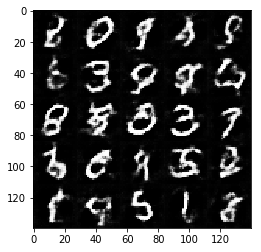

Epoch 1/2... Batch 510... Discriminator Loss: 1.4603... Generator Loss: 0.5367
Epoch 1/2... Batch 520... Discriminator Loss: 1.2719... Generator Loss: 0.6653
Epoch 1/2... Batch 530... Discriminator Loss: 1.3741... Generator Loss: 0.8046
Epoch 1/2... Batch 540... Discriminator Loss: 1.2608... Generator Loss: 0.7337
Epoch 1/2... Batch 550... Discriminator Loss: 1.3195... Generator Loss: 0.6656
Epoch 1/2... Batch 560... Discriminator Loss: 1.5605... Generator Loss: 0.4720
Epoch 1/2... Batch 570... Discriminator Loss: 1.4079... Generator Loss: 0.6126
Epoch 1/2... Batch 580... Discriminator Loss: 1.5962... Generator Loss: 0.4109
Epoch 1/2... Batch 590... Discriminator Loss: 1.2678... Generator Loss: 0.8565
Epoch 1/2... Batch 600... Discriminator Loss: 1.0838... Generator Loss: 0.9697


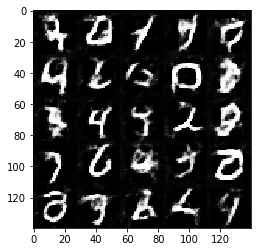

Epoch 1/2... Batch 610... Discriminator Loss: 1.7667... Generator Loss: 0.3333
Epoch 1/2... Batch 620... Discriminator Loss: 1.3076... Generator Loss: 0.6299
Epoch 1/2... Batch 630... Discriminator Loss: 1.1817... Generator Loss: 0.8490
Epoch 1/2... Batch 640... Discriminator Loss: 1.2174... Generator Loss: 1.0538
Epoch 1/2... Batch 650... Discriminator Loss: 1.7218... Generator Loss: 0.3430
Epoch 1/2... Batch 660... Discriminator Loss: 1.4073... Generator Loss: 0.5497
Epoch 1/2... Batch 670... Discriminator Loss: 1.5954... Generator Loss: 0.4162
Epoch 1/2... Batch 680... Discriminator Loss: 2.0029... Generator Loss: 0.2464
Epoch 1/2... Batch 690... Discriminator Loss: 1.2188... Generator Loss: 0.9442
Epoch 1/2... Batch 700... Discriminator Loss: 1.4354... Generator Loss: 0.5243


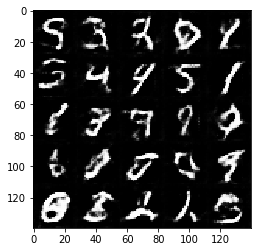

Epoch 1/2... Batch 710... Discriminator Loss: 1.9149... Generator Loss: 0.2734
Epoch 1/2... Batch 720... Discriminator Loss: 1.9183... Generator Loss: 0.2563
Epoch 1/2... Batch 730... Discriminator Loss: 1.4195... Generator Loss: 0.5376
Epoch 1/2... Batch 740... Discriminator Loss: 1.4660... Generator Loss: 0.5302
Epoch 1/2... Batch 750... Discriminator Loss: 1.4862... Generator Loss: 0.4724
Epoch 1/2... Batch 760... Discriminator Loss: 1.4444... Generator Loss: 0.4857
Epoch 1/2... Batch 770... Discriminator Loss: 1.4437... Generator Loss: 0.4722
Epoch 1/2... Batch 780... Discriminator Loss: 1.3357... Generator Loss: 1.6175
Epoch 1/2... Batch 790... Discriminator Loss: 1.4542... Generator Loss: 0.4848
Epoch 1/2... Batch 800... Discriminator Loss: 1.2653... Generator Loss: 0.6703


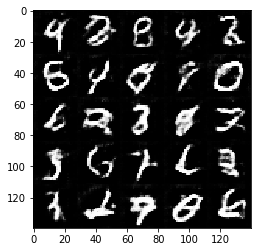

Epoch 1/2... Batch 810... Discriminator Loss: 1.2402... Generator Loss: 0.6474
Epoch 1/2... Batch 820... Discriminator Loss: 1.3992... Generator Loss: 1.8300
Epoch 1/2... Batch 830... Discriminator Loss: 1.1497... Generator Loss: 0.9420
Epoch 1/2... Batch 840... Discriminator Loss: 1.0395... Generator Loss: 0.9455
Epoch 1/2... Batch 850... Discriminator Loss: 1.4636... Generator Loss: 0.4647
Epoch 1/2... Batch 860... Discriminator Loss: 1.4216... Generator Loss: 0.5173
Epoch 1/2... Batch 870... Discriminator Loss: 1.6546... Generator Loss: 0.4272
Epoch 1/2... Batch 880... Discriminator Loss: 1.0602... Generator Loss: 1.4117
Epoch 1/2... Batch 890... Discriminator Loss: 1.2025... Generator Loss: 0.7907
Epoch 1/2... Batch 900... Discriminator Loss: 1.1279... Generator Loss: 0.7934


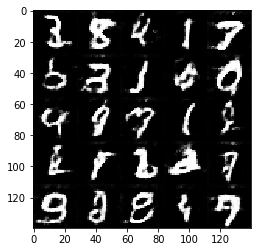

Epoch 1/2... Batch 910... Discriminator Loss: 0.9874... Generator Loss: 1.2537
Epoch 1/2... Batch 920... Discriminator Loss: 1.0530... Generator Loss: 1.3197
Epoch 1/2... Batch 930... Discriminator Loss: 2.1838... Generator Loss: 0.2309
Epoch 2/2... Batch 10... Discriminator Loss: 1.2999... Generator Loss: 0.5853
Epoch 2/2... Batch 20... Discriminator Loss: 1.1372... Generator Loss: 0.9731
Epoch 2/2... Batch 30... Discriminator Loss: 1.1608... Generator Loss: 0.7948
Epoch 2/2... Batch 40... Discriminator Loss: 1.2907... Generator Loss: 0.6011
Epoch 2/2... Batch 50... Discriminator Loss: 1.1111... Generator Loss: 0.8461
Epoch 2/2... Batch 60... Discriminator Loss: 1.0673... Generator Loss: 0.8110
Epoch 2/2... Batch 70... Discriminator Loss: 1.3967... Generator Loss: 0.5175
Epoch 2/2... Batch 80... Discriminator Loss: 1.1107... Generator Loss: 1.3120
Epoch 2/2... Batch 90... Discriminator Loss: 1.0584... Generator Loss: 0.9038
Epoch 2/2... Batch 100... Discriminator Loss: 1.2178... Gener

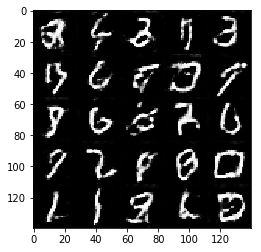

Epoch 2/2... Batch 110... Discriminator Loss: 1.1614... Generator Loss: 1.3480
Epoch 2/2... Batch 120... Discriminator Loss: 1.0170... Generator Loss: 0.8851
Epoch 2/2... Batch 130... Discriminator Loss: 1.2014... Generator Loss: 0.6555
Epoch 2/2... Batch 140... Discriminator Loss: 2.1335... Generator Loss: 0.3013
Epoch 2/2... Batch 150... Discriminator Loss: 1.1899... Generator Loss: 0.7447
Epoch 2/2... Batch 160... Discriminator Loss: 1.1011... Generator Loss: 0.8830
Epoch 2/2... Batch 170... Discriminator Loss: 1.3434... Generator Loss: 0.5512
Epoch 2/2... Batch 180... Discriminator Loss: 1.0930... Generator Loss: 0.9563
Epoch 2/2... Batch 190... Discriminator Loss: 1.9035... Generator Loss: 0.2925
Epoch 2/2... Batch 200... Discriminator Loss: 1.1540... Generator Loss: 0.7019


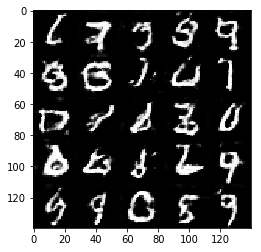

Epoch 2/2... Batch 210... Discriminator Loss: 1.0208... Generator Loss: 0.8905
Epoch 2/2... Batch 220... Discriminator Loss: 1.2496... Generator Loss: 0.7271
Epoch 2/2... Batch 230... Discriminator Loss: 1.1795... Generator Loss: 0.8445
Epoch 2/2... Batch 240... Discriminator Loss: 1.1601... Generator Loss: 0.8073
Epoch 2/2... Batch 250... Discriminator Loss: 1.0785... Generator Loss: 0.8174
Epoch 2/2... Batch 260... Discriminator Loss: 2.7147... Generator Loss: 3.7810
Epoch 2/2... Batch 270... Discriminator Loss: 1.2922... Generator Loss: 0.7960
Epoch 2/2... Batch 280... Discriminator Loss: 1.1659... Generator Loss: 0.7583
Epoch 2/2... Batch 290... Discriminator Loss: 1.1819... Generator Loss: 0.7318
Epoch 2/2... Batch 300... Discriminator Loss: 1.0698... Generator Loss: 0.8410


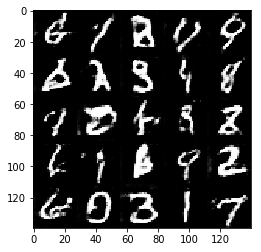

Epoch 2/2... Batch 310... Discriminator Loss: 1.4604... Generator Loss: 1.6004
Epoch 2/2... Batch 320... Discriminator Loss: 1.3034... Generator Loss: 0.6119
Epoch 2/2... Batch 330... Discriminator Loss: 0.9703... Generator Loss: 1.0916
Epoch 2/2... Batch 340... Discriminator Loss: 1.2128... Generator Loss: 0.6506
Epoch 2/2... Batch 350... Discriminator Loss: 0.8977... Generator Loss: 1.2499
Epoch 2/2... Batch 360... Discriminator Loss: 0.8804... Generator Loss: 1.1395
Epoch 2/2... Batch 370... Discriminator Loss: 1.0002... Generator Loss: 2.2827
Epoch 2/2... Batch 380... Discriminator Loss: 0.9325... Generator Loss: 1.1188
Epoch 2/2... Batch 390... Discriminator Loss: 0.9895... Generator Loss: 1.1827
Epoch 2/2... Batch 400... Discriminator Loss: 1.1800... Generator Loss: 0.7116


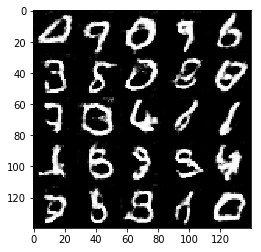

Epoch 2/2... Batch 410... Discriminator Loss: 0.8382... Generator Loss: 1.2655
Epoch 2/2... Batch 420... Discriminator Loss: 0.8881... Generator Loss: 1.0656
Epoch 2/2... Batch 430... Discriminator Loss: 1.2000... Generator Loss: 0.6995
Epoch 2/2... Batch 440... Discriminator Loss: 1.3422... Generator Loss: 0.5659
Epoch 2/2... Batch 450... Discriminator Loss: 0.9119... Generator Loss: 1.5901
Epoch 2/2... Batch 460... Discriminator Loss: 1.1814... Generator Loss: 0.7301
Epoch 2/2... Batch 470... Discriminator Loss: 1.2738... Generator Loss: 0.6478
Epoch 2/2... Batch 480... Discriminator Loss: 1.0302... Generator Loss: 1.1319
Epoch 2/2... Batch 490... Discriminator Loss: 0.8162... Generator Loss: 1.3278
Epoch 2/2... Batch 500... Discriminator Loss: 1.3945... Generator Loss: 0.5327


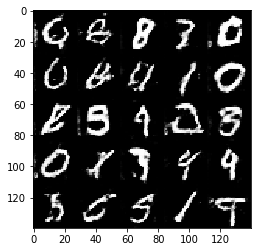

Epoch 2/2... Batch 510... Discriminator Loss: 1.2985... Generator Loss: 0.5860
Epoch 2/2... Batch 520... Discriminator Loss: 0.9270... Generator Loss: 1.0383
Epoch 2/2... Batch 530... Discriminator Loss: 1.5846... Generator Loss: 0.4174
Epoch 2/2... Batch 540... Discriminator Loss: 0.7901... Generator Loss: 1.2797
Epoch 2/2... Batch 550... Discriminator Loss: 0.8536... Generator Loss: 1.1492
Epoch 2/2... Batch 560... Discriminator Loss: 1.3487... Generator Loss: 0.6139
Epoch 2/2... Batch 570... Discriminator Loss: 1.1612... Generator Loss: 1.1380
Epoch 2/2... Batch 580... Discriminator Loss: 1.2328... Generator Loss: 0.6457
Epoch 2/2... Batch 590... Discriminator Loss: 1.1298... Generator Loss: 0.9932
Epoch 2/2... Batch 600... Discriminator Loss: 0.9835... Generator Loss: 1.0820


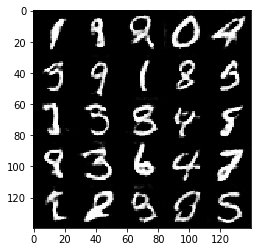

Epoch 2/2... Batch 610... Discriminator Loss: 0.9814... Generator Loss: 1.6198
Epoch 2/2... Batch 620... Discriminator Loss: 1.2976... Generator Loss: 0.5956
Epoch 2/2... Batch 630... Discriminator Loss: 0.7629... Generator Loss: 1.3124
Epoch 2/2... Batch 640... Discriminator Loss: 0.9746... Generator Loss: 1.6565
Epoch 2/2... Batch 650... Discriminator Loss: 0.8945... Generator Loss: 1.2617
Epoch 2/2... Batch 660... Discriminator Loss: 0.9900... Generator Loss: 0.9082
Epoch 2/2... Batch 670... Discriminator Loss: 0.8973... Generator Loss: 1.1579
Epoch 2/2... Batch 680... Discriminator Loss: 1.3128... Generator Loss: 0.6734
Epoch 2/2... Batch 690... Discriminator Loss: 2.0902... Generator Loss: 0.2719
Epoch 2/2... Batch 700... Discriminator Loss: 0.9492... Generator Loss: 1.3094


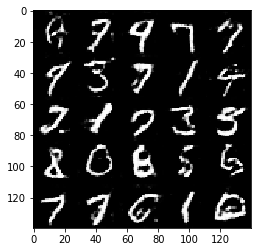

Epoch 2/2... Batch 710... Discriminator Loss: 1.4604... Generator Loss: 0.5419
Epoch 2/2... Batch 720... Discriminator Loss: 1.2812... Generator Loss: 0.6305
Epoch 2/2... Batch 730... Discriminator Loss: 1.2520... Generator Loss: 0.6302
Epoch 2/2... Batch 740... Discriminator Loss: 1.1071... Generator Loss: 0.7839
Epoch 2/2... Batch 750... Discriminator Loss: 1.1731... Generator Loss: 0.6950
Epoch 2/2... Batch 760... Discriminator Loss: 2.1807... Generator Loss: 0.3027
Epoch 2/2... Batch 770... Discriminator Loss: 1.1252... Generator Loss: 0.7880
Epoch 2/2... Batch 780... Discriminator Loss: 1.0599... Generator Loss: 1.0346
Epoch 2/2... Batch 790... Discriminator Loss: 0.9064... Generator Loss: 0.9898
Epoch 2/2... Batch 800... Discriminator Loss: 0.8151... Generator Loss: 1.1786


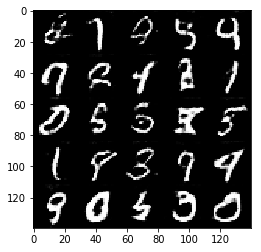

Epoch 2/2... Batch 810... Discriminator Loss: 0.6996... Generator Loss: 1.8788
Epoch 2/2... Batch 820... Discriminator Loss: 1.3185... Generator Loss: 2.2056
Epoch 2/2... Batch 830... Discriminator Loss: 0.8973... Generator Loss: 1.5160
Epoch 2/2... Batch 840... Discriminator Loss: 1.1239... Generator Loss: 0.7643
Epoch 2/2... Batch 850... Discriminator Loss: 0.7565... Generator Loss: 1.7144
Epoch 2/2... Batch 860... Discriminator Loss: 0.8172... Generator Loss: 1.5300
Epoch 2/2... Batch 870... Discriminator Loss: 0.8852... Generator Loss: 1.4818
Epoch 2/2... Batch 880... Discriminator Loss: 1.1928... Generator Loss: 0.6610
Epoch 2/2... Batch 890... Discriminator Loss: 1.5291... Generator Loss: 0.4428
Epoch 2/2... Batch 900... Discriminator Loss: 0.9055... Generator Loss: 1.9022


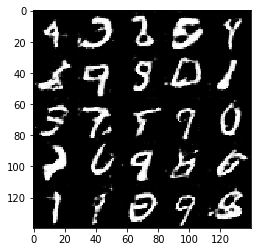

Epoch 2/2... Batch 910... Discriminator Loss: 1.2603... Generator Loss: 0.6362
Epoch 2/2... Batch 920... Discriminator Loss: 0.8270... Generator Loss: 1.2968
Epoch 2/2... Batch 930... Discriminator Loss: 1.6813... Generator Loss: 0.4903


In [20]:
batch_size = 64
z_dim = 512
learning_rate = 0.0003
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 1.6729... Generator Loss: 9.1468
Epoch 1/1... Batch 20... Discriminator Loss: 0.7254... Generator Loss: 3.7660
Epoch 1/1... Batch 30... Discriminator Loss: 3.2807... Generator Loss: 0.2307
Epoch 1/1... Batch 40... Discriminator Loss: 1.1600... Generator Loss: 2.5144
Epoch 1/1... Batch 50... Discriminator Loss: 1.4056... Generator Loss: 2.3745
Epoch 1/1... Batch 60... Discriminator Loss: 1.6597... Generator Loss: 0.5614
Epoch 1/1... Batch 70... Discriminator Loss: 1.5094... Generator Loss: 0.6479
Epoch 1/1... Batch 80... Discriminator Loss: 1.5291... Generator Loss: 0.7205
Epoch 1/1... Batch 90... Discriminator Loss: 2.1566... Generator Loss: 0.2256
Epoch 1/1... Batch 100... Discriminator Loss: 2.0905... Generator Loss: 0.2793


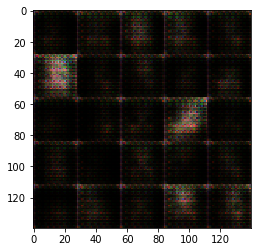

Epoch 1/1... Batch 110... Discriminator Loss: 1.5707... Generator Loss: 0.6674
Epoch 1/1... Batch 120... Discriminator Loss: 2.0615... Generator Loss: 0.2479
Epoch 1/1... Batch 130... Discriminator Loss: 1.6271... Generator Loss: 0.5704
Epoch 1/1... Batch 140... Discriminator Loss: 1.8971... Generator Loss: 0.9023
Epoch 1/1... Batch 150... Discriminator Loss: 1.8974... Generator Loss: 0.3328
Epoch 1/1... Batch 160... Discriminator Loss: 1.6725... Generator Loss: 0.5843
Epoch 1/1... Batch 170... Discriminator Loss: 1.5854... Generator Loss: 0.9127
Epoch 1/1... Batch 180... Discriminator Loss: 1.6496... Generator Loss: 0.6737
Epoch 1/1... Batch 190... Discriminator Loss: 1.6629... Generator Loss: 0.5020
Epoch 1/1... Batch 200... Discriminator Loss: 1.7427... Generator Loss: 0.4535


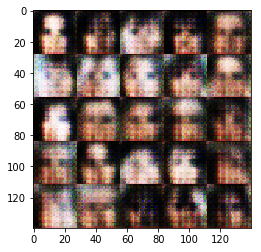

Epoch 1/1... Batch 210... Discriminator Loss: 1.6755... Generator Loss: 0.4549
Epoch 1/1... Batch 220... Discriminator Loss: 1.7586... Generator Loss: 0.3849
Epoch 1/1... Batch 230... Discriminator Loss: 1.6625... Generator Loss: 0.7055
Epoch 1/1... Batch 240... Discriminator Loss: 1.4731... Generator Loss: 0.9202
Epoch 1/1... Batch 250... Discriminator Loss: 1.6749... Generator Loss: 0.5129
Epoch 1/1... Batch 260... Discriminator Loss: 1.9409... Generator Loss: 0.2950
Epoch 1/1... Batch 270... Discriminator Loss: 2.3558... Generator Loss: 0.2003
Epoch 1/1... Batch 280... Discriminator Loss: 1.7324... Generator Loss: 0.5958
Epoch 1/1... Batch 290... Discriminator Loss: 1.6297... Generator Loss: 0.4793
Epoch 1/1... Batch 300... Discriminator Loss: 1.6724... Generator Loss: 0.7579


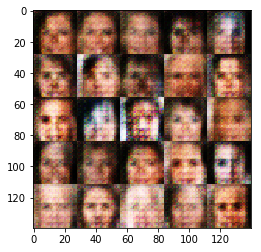

Epoch 1/1... Batch 310... Discriminator Loss: 1.5172... Generator Loss: 0.6014
Epoch 1/1... Batch 320... Discriminator Loss: 1.9325... Generator Loss: 0.3049
Epoch 1/1... Batch 330... Discriminator Loss: 1.4228... Generator Loss: 0.9294
Epoch 1/1... Batch 340... Discriminator Loss: 1.6064... Generator Loss: 0.4912
Epoch 1/1... Batch 350... Discriminator Loss: 1.8221... Generator Loss: 0.3007
Epoch 1/1... Batch 360... Discriminator Loss: 1.9503... Generator Loss: 0.2879
Epoch 1/1... Batch 370... Discriminator Loss: 1.7888... Generator Loss: 0.3343
Epoch 1/1... Batch 380... Discriminator Loss: 1.4085... Generator Loss: 0.6336
Epoch 1/1... Batch 390... Discriminator Loss: 1.6895... Generator Loss: 0.4591
Epoch 1/1... Batch 400... Discriminator Loss: 1.8839... Generator Loss: 0.3645


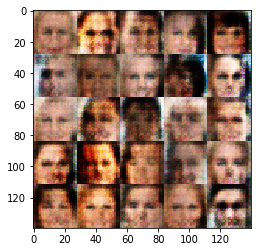

Epoch 1/1... Batch 410... Discriminator Loss: 1.8174... Generator Loss: 1.2831
Epoch 1/1... Batch 420... Discriminator Loss: 1.2931... Generator Loss: 1.4884
Epoch 1/1... Batch 430... Discriminator Loss: 1.4031... Generator Loss: 0.7094
Epoch 1/1... Batch 440... Discriminator Loss: 1.3463... Generator Loss: 1.0805
Epoch 1/1... Batch 450... Discriminator Loss: 1.3818... Generator Loss: 0.7701
Epoch 1/1... Batch 460... Discriminator Loss: 1.7444... Generator Loss: 0.4063
Epoch 1/1... Batch 470... Discriminator Loss: 1.1746... Generator Loss: 0.7816
Epoch 1/1... Batch 480... Discriminator Loss: 1.8058... Generator Loss: 0.9001
Epoch 1/1... Batch 490... Discriminator Loss: 1.2349... Generator Loss: 0.7178
Epoch 1/1... Batch 500... Discriminator Loss: 1.7729... Generator Loss: 0.4353


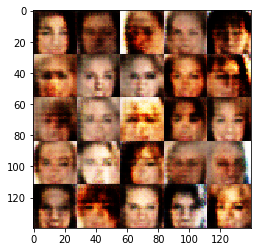

Epoch 1/1... Batch 510... Discriminator Loss: 1.3264... Generator Loss: 1.2194
Epoch 1/1... Batch 520... Discriminator Loss: 1.5164... Generator Loss: 0.5330
Epoch 1/1... Batch 530... Discriminator Loss: 1.3525... Generator Loss: 0.6499
Epoch 1/1... Batch 540... Discriminator Loss: 1.5025... Generator Loss: 1.9794
Epoch 1/1... Batch 550... Discriminator Loss: 1.3912... Generator Loss: 0.5539
Epoch 1/1... Batch 560... Discriminator Loss: 1.5467... Generator Loss: 0.4171
Epoch 1/1... Batch 570... Discriminator Loss: 1.3695... Generator Loss: 0.8002
Epoch 1/1... Batch 580... Discriminator Loss: 2.4600... Generator Loss: 0.1483
Epoch 1/1... Batch 590... Discriminator Loss: 1.2829... Generator Loss: 0.7346
Epoch 1/1... Batch 600... Discriminator Loss: 1.2863... Generator Loss: 0.6722


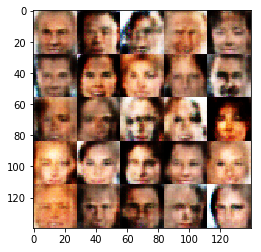

Epoch 1/1... Batch 610... Discriminator Loss: 1.0487... Generator Loss: 1.1273
Epoch 1/1... Batch 620... Discriminator Loss: 1.6974... Generator Loss: 0.9744
Epoch 1/1... Batch 630... Discriminator Loss: 1.5209... Generator Loss: 0.5397
Epoch 1/1... Batch 640... Discriminator Loss: 1.4761... Generator Loss: 0.6821
Epoch 1/1... Batch 650... Discriminator Loss: 1.7106... Generator Loss: 0.3357
Epoch 1/1... Batch 660... Discriminator Loss: 1.3658... Generator Loss: 1.7339
Epoch 1/1... Batch 670... Discriminator Loss: 1.4836... Generator Loss: 0.4601
Epoch 1/1... Batch 680... Discriminator Loss: 0.9947... Generator Loss: 0.8387
Epoch 1/1... Batch 690... Discriminator Loss: 1.1209... Generator Loss: 0.8992
Epoch 1/1... Batch 700... Discriminator Loss: 1.3892... Generator Loss: 0.9129


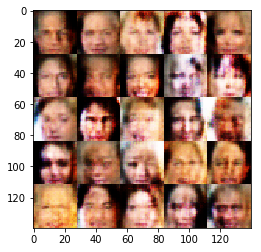

Epoch 1/1... Batch 710... Discriminator Loss: 1.7607... Generator Loss: 0.3709
Epoch 1/1... Batch 720... Discriminator Loss: 1.3663... Generator Loss: 0.7993
Epoch 1/1... Batch 730... Discriminator Loss: 2.0585... Generator Loss: 0.2240
Epoch 1/1... Batch 740... Discriminator Loss: 1.5698... Generator Loss: 0.3714
Epoch 1/1... Batch 750... Discriminator Loss: 1.6572... Generator Loss: 0.3729
Epoch 1/1... Batch 760... Discriminator Loss: 1.4356... Generator Loss: 0.5746
Epoch 1/1... Batch 770... Discriminator Loss: 0.9430... Generator Loss: 1.9869
Epoch 1/1... Batch 780... Discriminator Loss: 1.3284... Generator Loss: 0.5279
Epoch 1/1... Batch 790... Discriminator Loss: 1.1416... Generator Loss: 0.7333
Epoch 1/1... Batch 800... Discriminator Loss: 0.9765... Generator Loss: 0.9280


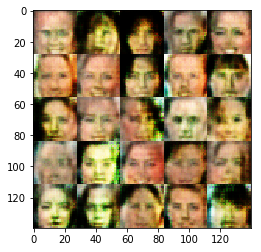

Epoch 1/1... Batch 810... Discriminator Loss: 1.6009... Generator Loss: 0.4203
Epoch 1/1... Batch 820... Discriminator Loss: 2.3064... Generator Loss: 2.4276
Epoch 1/1... Batch 830... Discriminator Loss: 1.0732... Generator Loss: 1.2084
Epoch 1/1... Batch 840... Discriminator Loss: 1.8919... Generator Loss: 0.2683
Epoch 1/1... Batch 850... Discriminator Loss: 1.1515... Generator Loss: 2.1368
Epoch 1/1... Batch 860... Discriminator Loss: 1.6323... Generator Loss: 0.3476
Epoch 1/1... Batch 870... Discriminator Loss: 1.7200... Generator Loss: 0.3427
Epoch 1/1... Batch 880... Discriminator Loss: 1.6904... Generator Loss: 0.3441
Epoch 1/1... Batch 890... Discriminator Loss: 0.6923... Generator Loss: 2.3467
Epoch 1/1... Batch 900... Discriminator Loss: 2.1366... Generator Loss: 0.1962


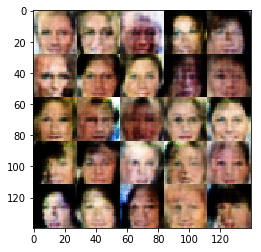

Epoch 1/1... Batch 910... Discriminator Loss: 0.6627... Generator Loss: 2.3785
Epoch 1/1... Batch 920... Discriminator Loss: 2.2387... Generator Loss: 0.1796
Epoch 1/1... Batch 930... Discriminator Loss: 1.1281... Generator Loss: 0.9019
Epoch 1/1... Batch 940... Discriminator Loss: 1.4714... Generator Loss: 0.6001
Epoch 1/1... Batch 950... Discriminator Loss: 1.5311... Generator Loss: 1.3599
Epoch 1/1... Batch 960... Discriminator Loss: 1.3166... Generator Loss: 0.9385
Epoch 1/1... Batch 970... Discriminator Loss: 0.8657... Generator Loss: 1.3292
Epoch 1/1... Batch 980... Discriminator Loss: 1.5862... Generator Loss: 0.6038
Epoch 1/1... Batch 990... Discriminator Loss: 1.4689... Generator Loss: 0.6141
Epoch 1/1... Batch 1000... Discriminator Loss: 1.4007... Generator Loss: 1.2184


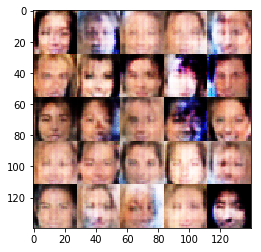

Epoch 1/1... Batch 1010... Discriminator Loss: 1.6155... Generator Loss: 0.4495
Epoch 1/1... Batch 1020... Discriminator Loss: 1.4926... Generator Loss: 0.6521
Epoch 1/1... Batch 1030... Discriminator Loss: 1.5092... Generator Loss: 0.6022
Epoch 1/1... Batch 1040... Discriminator Loss: 1.5031... Generator Loss: 1.0801
Epoch 1/1... Batch 1050... Discriminator Loss: 1.3024... Generator Loss: 1.4621
Epoch 1/1... Batch 1060... Discriminator Loss: 0.8369... Generator Loss: 1.0780
Epoch 1/1... Batch 1070... Discriminator Loss: 1.5758... Generator Loss: 0.7592
Epoch 1/1... Batch 1080... Discriminator Loss: 1.4692... Generator Loss: 0.5293
Epoch 1/1... Batch 1090... Discriminator Loss: 1.7273... Generator Loss: 0.3229
Epoch 1/1... Batch 1100... Discriminator Loss: 1.6786... Generator Loss: 0.3975


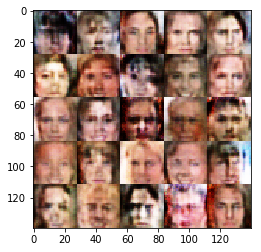

Epoch 1/1... Batch 1110... Discriminator Loss: 1.4104... Generator Loss: 0.6293
Epoch 1/1... Batch 1120... Discriminator Loss: 1.6628... Generator Loss: 1.4809
Epoch 1/1... Batch 1130... Discriminator Loss: 0.6255... Generator Loss: 2.0299
Epoch 1/1... Batch 1140... Discriminator Loss: 1.5322... Generator Loss: 0.5104
Epoch 1/1... Batch 1150... Discriminator Loss: 1.3223... Generator Loss: 0.7170
Epoch 1/1... Batch 1160... Discriminator Loss: 1.9257... Generator Loss: 0.2655
Epoch 1/1... Batch 1170... Discriminator Loss: 1.4532... Generator Loss: 1.1480
Epoch 1/1... Batch 1180... Discriminator Loss: 1.4260... Generator Loss: 0.4690
Epoch 1/1... Batch 1190... Discriminator Loss: 1.3538... Generator Loss: 0.5221
Epoch 1/1... Batch 1200... Discriminator Loss: 1.8134... Generator Loss: 0.2999


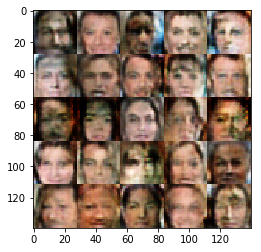

Epoch 1/1... Batch 1210... Discriminator Loss: 1.4859... Generator Loss: 0.5590
Epoch 1/1... Batch 1220... Discriminator Loss: 1.6065... Generator Loss: 0.5181
Epoch 1/1... Batch 1230... Discriminator Loss: 1.5911... Generator Loss: 0.4233
Epoch 1/1... Batch 1240... Discriminator Loss: 1.5261... Generator Loss: 0.5297
Epoch 1/1... Batch 1250... Discriminator Loss: 1.4768... Generator Loss: 0.6602
Epoch 1/1... Batch 1260... Discriminator Loss: 1.5414... Generator Loss: 0.6719
Epoch 1/1... Batch 1270... Discriminator Loss: 1.6529... Generator Loss: 0.4624
Epoch 1/1... Batch 1280... Discriminator Loss: 1.6458... Generator Loss: 0.4361
Epoch 1/1... Batch 1290... Discriminator Loss: 1.6473... Generator Loss: 0.9627
Epoch 1/1... Batch 1300... Discriminator Loss: 1.4547... Generator Loss: 0.4826


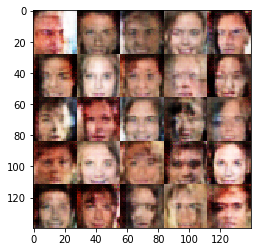

Epoch 1/1... Batch 1310... Discriminator Loss: 1.4059... Generator Loss: 0.7784
Epoch 1/1... Batch 1320... Discriminator Loss: 1.6562... Generator Loss: 0.3662
Epoch 1/1... Batch 1330... Discriminator Loss: 1.7810... Generator Loss: 0.4798
Epoch 1/1... Batch 1340... Discriminator Loss: 1.3760... Generator Loss: 0.6963
Epoch 1/1... Batch 1350... Discriminator Loss: 1.6322... Generator Loss: 0.5558
Epoch 1/1... Batch 1360... Discriminator Loss: 1.4612... Generator Loss: 0.6315
Epoch 1/1... Batch 1370... Discriminator Loss: 1.4407... Generator Loss: 0.7678
Epoch 1/1... Batch 1380... Discriminator Loss: 1.5636... Generator Loss: 0.5788
Epoch 1/1... Batch 1390... Discriminator Loss: 1.4836... Generator Loss: 0.5972
Epoch 1/1... Batch 1400... Discriminator Loss: 1.3160... Generator Loss: 0.6702


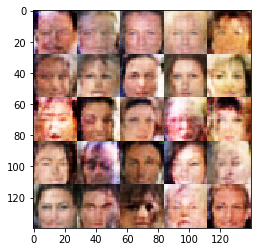

Epoch 1/1... Batch 1410... Discriminator Loss: 2.4462... Generator Loss: 0.1617
Epoch 1/1... Batch 1420... Discriminator Loss: 1.7039... Generator Loss: 0.4466
Epoch 1/1... Batch 1430... Discriminator Loss: 1.6012... Generator Loss: 0.5962
Epoch 1/1... Batch 1440... Discriminator Loss: 1.7303... Generator Loss: 0.4098
Epoch 1/1... Batch 1450... Discriminator Loss: 1.3255... Generator Loss: 0.7863
Epoch 1/1... Batch 1460... Discriminator Loss: 1.4129... Generator Loss: 0.6945
Epoch 1/1... Batch 1470... Discriminator Loss: 1.8067... Generator Loss: 0.3535
Epoch 1/1... Batch 1480... Discriminator Loss: 1.4361... Generator Loss: 0.6029
Epoch 1/1... Batch 1490... Discriminator Loss: 1.6411... Generator Loss: 0.5622
Epoch 1/1... Batch 1500... Discriminator Loss: 1.3178... Generator Loss: 0.7371


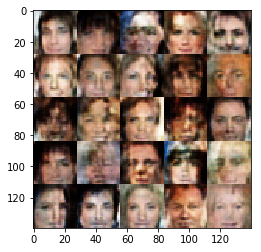

Epoch 1/1... Batch 1510... Discriminator Loss: 1.6420... Generator Loss: 0.3397
Epoch 1/1... Batch 1520... Discriminator Loss: 1.0629... Generator Loss: 1.2320
Epoch 1/1... Batch 1530... Discriminator Loss: 1.4461... Generator Loss: 0.6904
Epoch 1/1... Batch 1540... Discriminator Loss: 1.1925... Generator Loss: 0.8654
Epoch 1/1... Batch 1550... Discriminator Loss: 1.5074... Generator Loss: 0.5435
Epoch 1/1... Batch 1560... Discriminator Loss: 1.6025... Generator Loss: 0.4580
Epoch 1/1... Batch 1570... Discriminator Loss: 1.5000... Generator Loss: 0.5940
Epoch 1/1... Batch 1580... Discriminator Loss: 1.5465... Generator Loss: 0.4808
Epoch 1/1... Batch 1590... Discriminator Loss: 1.5258... Generator Loss: 0.5900
Epoch 1/1... Batch 1600... Discriminator Loss: 1.2676... Generator Loss: 0.9076


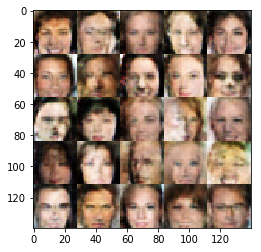

Epoch 1/1... Batch 1610... Discriminator Loss: 1.6046... Generator Loss: 0.4230
Epoch 1/1... Batch 1620... Discriminator Loss: 1.7119... Generator Loss: 0.4066
Epoch 1/1... Batch 1630... Discriminator Loss: 1.3241... Generator Loss: 0.7618
Epoch 1/1... Batch 1640... Discriminator Loss: 1.6857... Generator Loss: 0.5085
Epoch 1/1... Batch 1650... Discriminator Loss: 1.5870... Generator Loss: 0.5319
Epoch 1/1... Batch 1660... Discriminator Loss: 1.6081... Generator Loss: 0.5565
Epoch 1/1... Batch 1670... Discriminator Loss: 1.5200... Generator Loss: 0.5035
Epoch 1/1... Batch 1680... Discriminator Loss: 1.5950... Generator Loss: 0.4498
Epoch 1/1... Batch 1690... Discriminator Loss: 1.6277... Generator Loss: 0.4846
Epoch 1/1... Batch 1700... Discriminator Loss: 2.0628... Generator Loss: 0.2279


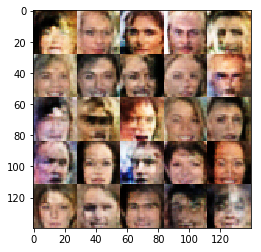

Epoch 1/1... Batch 1710... Discriminator Loss: 1.6144... Generator Loss: 0.5545
Epoch 1/1... Batch 1720... Discriminator Loss: 2.0179... Generator Loss: 0.2194
Epoch 1/1... Batch 1730... Discriminator Loss: 1.5933... Generator Loss: 0.4948
Epoch 1/1... Batch 1740... Discriminator Loss: 1.8719... Generator Loss: 0.3238
Epoch 1/1... Batch 1750... Discriminator Loss: 1.3505... Generator Loss: 0.6249
Epoch 1/1... Batch 1760... Discriminator Loss: 1.5980... Generator Loss: 0.4432
Epoch 1/1... Batch 1770... Discriminator Loss: 1.6550... Generator Loss: 0.3805
Epoch 1/1... Batch 1780... Discriminator Loss: 1.5819... Generator Loss: 0.5741
Epoch 1/1... Batch 1790... Discriminator Loss: 1.4357... Generator Loss: 0.7188
Epoch 1/1... Batch 1800... Discriminator Loss: 1.6049... Generator Loss: 0.4728


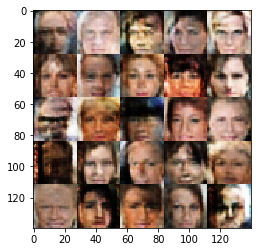

Epoch 1/1... Batch 1810... Discriminator Loss: 1.7344... Generator Loss: 0.3983
Epoch 1/1... Batch 1820... Discriminator Loss: 1.4144... Generator Loss: 0.4903
Epoch 1/1... Batch 1830... Discriminator Loss: 1.5167... Generator Loss: 0.6240
Epoch 1/1... Batch 1840... Discriminator Loss: 2.1410... Generator Loss: 0.1987
Epoch 1/1... Batch 1850... Discriminator Loss: 1.4198... Generator Loss: 0.6528
Epoch 1/1... Batch 1860... Discriminator Loss: 1.6501... Generator Loss: 0.6521
Epoch 1/1... Batch 1870... Discriminator Loss: 1.6789... Generator Loss: 0.4053
Epoch 1/1... Batch 1880... Discriminator Loss: 1.5889... Generator Loss: 0.4421
Epoch 1/1... Batch 1890... Discriminator Loss: 1.5886... Generator Loss: 0.4204
Epoch 1/1... Batch 1900... Discriminator Loss: 1.6967... Generator Loss: 0.3461


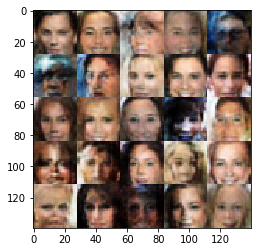

Epoch 1/1... Batch 1910... Discriminator Loss: 1.2495... Generator Loss: 0.8637
Epoch 1/1... Batch 1920... Discriminator Loss: 1.6604... Generator Loss: 0.4204
Epoch 1/1... Batch 1930... Discriminator Loss: 1.6578... Generator Loss: 0.4177
Epoch 1/1... Batch 1940... Discriminator Loss: 1.6774... Generator Loss: 0.4034
Epoch 1/1... Batch 1950... Discriminator Loss: 1.7100... Generator Loss: 0.3983
Epoch 1/1... Batch 1960... Discriminator Loss: 1.6394... Generator Loss: 0.7921
Epoch 1/1... Batch 1970... Discriminator Loss: 1.6105... Generator Loss: 0.4406
Epoch 1/1... Batch 1980... Discriminator Loss: 1.8411... Generator Loss: 0.3156
Epoch 1/1... Batch 1990... Discriminator Loss: 1.3200... Generator Loss: 0.8477
Epoch 1/1... Batch 2000... Discriminator Loss: 1.8319... Generator Loss: 0.3380


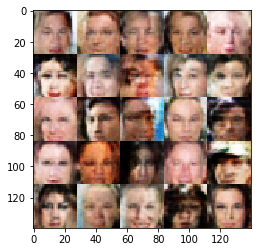

Epoch 1/1... Batch 2010... Discriminator Loss: 2.2506... Generator Loss: 0.1691
Epoch 1/1... Batch 2020... Discriminator Loss: 1.7222... Generator Loss: 0.4286
Epoch 1/1... Batch 2030... Discriminator Loss: 1.6892... Generator Loss: 0.4207
Epoch 1/1... Batch 2040... Discriminator Loss: 1.8411... Generator Loss: 0.3297
Epoch 1/1... Batch 2050... Discriminator Loss: 1.4193... Generator Loss: 0.9562
Epoch 1/1... Batch 2060... Discriminator Loss: 1.2285... Generator Loss: 0.7776
Epoch 1/1... Batch 2070... Discriminator Loss: 1.5893... Generator Loss: 0.4996
Epoch 1/1... Batch 2080... Discriminator Loss: 1.5610... Generator Loss: 0.9951
Epoch 1/1... Batch 2090... Discriminator Loss: 1.6070... Generator Loss: 0.5581
Epoch 1/1... Batch 2100... Discriminator Loss: 1.7233... Generator Loss: 0.3633


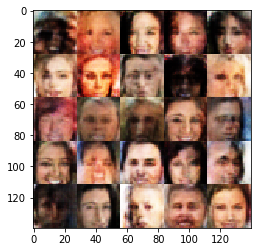

Epoch 1/1... Batch 2110... Discriminator Loss: 1.5757... Generator Loss: 0.4203
Epoch 1/1... Batch 2120... Discriminator Loss: 1.5443... Generator Loss: 0.5019
Epoch 1/1... Batch 2130... Discriminator Loss: 1.6456... Generator Loss: 0.4019
Epoch 1/1... Batch 2140... Discriminator Loss: 1.5490... Generator Loss: 0.8037
Epoch 1/1... Batch 2150... Discriminator Loss: 2.0337... Generator Loss: 0.2323
Epoch 1/1... Batch 2160... Discriminator Loss: 1.4061... Generator Loss: 0.7935
Epoch 1/1... Batch 2170... Discriminator Loss: 1.5100... Generator Loss: 0.7555
Epoch 1/1... Batch 2180... Discriminator Loss: 1.5678... Generator Loss: 0.4519
Epoch 1/1... Batch 2190... Discriminator Loss: 1.5532... Generator Loss: 0.4601
Epoch 1/1... Batch 2200... Discriminator Loss: 1.7146... Generator Loss: 0.4781


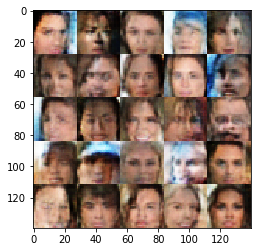

Epoch 1/1... Batch 2210... Discriminator Loss: 1.9187... Generator Loss: 0.2519
Epoch 1/1... Batch 2220... Discriminator Loss: 1.7664... Generator Loss: 0.3793
Epoch 1/1... Batch 2230... Discriminator Loss: 1.6415... Generator Loss: 0.3992
Epoch 1/1... Batch 2240... Discriminator Loss: 1.5070... Generator Loss: 0.7073
Epoch 1/1... Batch 2250... Discriminator Loss: 2.0102... Generator Loss: 0.2319
Epoch 1/1... Batch 2260... Discriminator Loss: 1.8652... Generator Loss: 0.2916
Epoch 1/1... Batch 2270... Discriminator Loss: 1.4975... Generator Loss: 0.6065
Epoch 1/1... Batch 2280... Discriminator Loss: 1.7189... Generator Loss: 0.3769
Epoch 1/1... Batch 2290... Discriminator Loss: 1.5953... Generator Loss: 0.4969
Epoch 1/1... Batch 2300... Discriminator Loss: 1.3532... Generator Loss: 0.9995


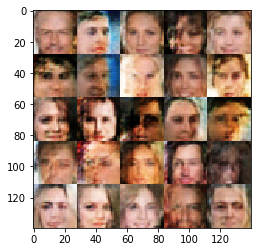

Epoch 1/1... Batch 2310... Discriminator Loss: 1.3863... Generator Loss: 0.5422
Epoch 1/1... Batch 2320... Discriminator Loss: 1.5993... Generator Loss: 0.5983
Epoch 1/1... Batch 2330... Discriminator Loss: 1.7857... Generator Loss: 0.3456
Epoch 1/1... Batch 2340... Discriminator Loss: 2.0490... Generator Loss: 0.2185
Epoch 1/1... Batch 2350... Discriminator Loss: 1.5279... Generator Loss: 0.4921
Epoch 1/1... Batch 2360... Discriminator Loss: 1.5809... Generator Loss: 0.8348
Epoch 1/1... Batch 2370... Discriminator Loss: 1.4443... Generator Loss: 0.5419
Epoch 1/1... Batch 2380... Discriminator Loss: 1.7282... Generator Loss: 0.5014
Epoch 1/1... Batch 2390... Discriminator Loss: 1.6997... Generator Loss: 0.4140
Epoch 1/1... Batch 2400... Discriminator Loss: 1.7795... Generator Loss: 1.4390


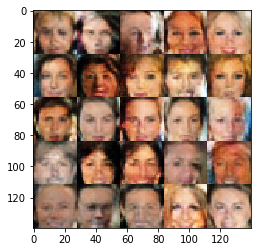

Epoch 1/1... Batch 2410... Discriminator Loss: 1.7007... Generator Loss: 0.4374
Epoch 1/1... Batch 2420... Discriminator Loss: 1.5664... Generator Loss: 0.5764
Epoch 1/1... Batch 2430... Discriminator Loss: 1.7039... Generator Loss: 0.4750
Epoch 1/1... Batch 2440... Discriminator Loss: 1.6740... Generator Loss: 0.5681
Epoch 1/1... Batch 2450... Discriminator Loss: 2.0180... Generator Loss: 0.2327
Epoch 1/1... Batch 2460... Discriminator Loss: 1.6663... Generator Loss: 0.4444
Epoch 1/1... Batch 2470... Discriminator Loss: 2.0790... Generator Loss: 0.2169
Epoch 1/1... Batch 2480... Discriminator Loss: 1.8126... Generator Loss: 0.5657
Epoch 1/1... Batch 2490... Discriminator Loss: 1.6213... Generator Loss: 0.9320
Epoch 1/1... Batch 2500... Discriminator Loss: 1.3335... Generator Loss: 0.6702


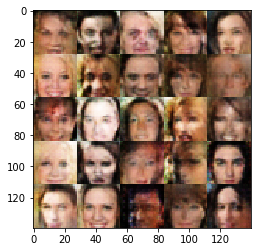

Epoch 1/1... Batch 2510... Discriminator Loss: 1.4317... Generator Loss: 1.1285
Epoch 1/1... Batch 2520... Discriminator Loss: 1.6756... Generator Loss: 0.4440
Epoch 1/1... Batch 2530... Discriminator Loss: 1.7753... Generator Loss: 1.0649
Epoch 1/1... Batch 2540... Discriminator Loss: 1.6772... Generator Loss: 0.4130
Epoch 1/1... Batch 2550... Discriminator Loss: 1.8465... Generator Loss: 0.3268
Epoch 1/1... Batch 2560... Discriminator Loss: 1.7003... Generator Loss: 0.4550
Epoch 1/1... Batch 2570... Discriminator Loss: 1.5111... Generator Loss: 0.8393
Epoch 1/1... Batch 2580... Discriminator Loss: 1.7062... Generator Loss: 0.3888
Epoch 1/1... Batch 2590... Discriminator Loss: 1.6367... Generator Loss: 0.4616
Epoch 1/1... Batch 2600... Discriminator Loss: 1.7935... Generator Loss: 1.5840


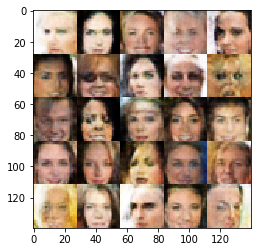

Epoch 1/1... Batch 2610... Discriminator Loss: 1.8971... Generator Loss: 0.3491
Epoch 1/1... Batch 2620... Discriminator Loss: 1.8431... Generator Loss: 0.3113
Epoch 1/1... Batch 2630... Discriminator Loss: 1.6970... Generator Loss: 0.3580
Epoch 1/1... Batch 2640... Discriminator Loss: 1.9583... Generator Loss: 0.2617
Epoch 1/1... Batch 2650... Discriminator Loss: 1.5684... Generator Loss: 0.5927
Epoch 1/1... Batch 2660... Discriminator Loss: 1.7625... Generator Loss: 0.3378
Epoch 1/1... Batch 2670... Discriminator Loss: 1.9083... Generator Loss: 0.2814
Epoch 1/1... Batch 2680... Discriminator Loss: 1.2595... Generator Loss: 0.7918
Epoch 1/1... Batch 2690... Discriminator Loss: 1.6870... Generator Loss: 0.3881
Epoch 1/1... Batch 2700... Discriminator Loss: 1.6189... Generator Loss: 0.4942


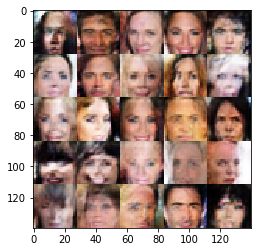

Epoch 1/1... Batch 2710... Discriminator Loss: 1.7863... Generator Loss: 0.3310
Epoch 1/1... Batch 2720... Discriminator Loss: 1.9358... Generator Loss: 0.2797
Epoch 1/1... Batch 2730... Discriminator Loss: 1.6206... Generator Loss: 0.5636
Epoch 1/1... Batch 2740... Discriminator Loss: 1.5812... Generator Loss: 0.4258
Epoch 1/1... Batch 2750... Discriminator Loss: 1.5297... Generator Loss: 0.5814
Epoch 1/1... Batch 2760... Discriminator Loss: 1.6086... Generator Loss: 0.4161
Epoch 1/1... Batch 2770... Discriminator Loss: 1.6100... Generator Loss: 0.5727
Epoch 1/1... Batch 2780... Discriminator Loss: 1.7704... Generator Loss: 0.3269
Epoch 1/1... Batch 2790... Discriminator Loss: 1.7594... Generator Loss: 0.3314
Epoch 1/1... Batch 2800... Discriminator Loss: 1.6485... Generator Loss: 0.9902


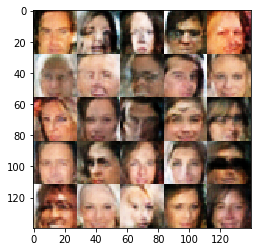

Epoch 1/1... Batch 2810... Discriminator Loss: 1.7201... Generator Loss: 0.4119
Epoch 1/1... Batch 2820... Discriminator Loss: 2.0799... Generator Loss: 0.2193
Epoch 1/1... Batch 2830... Discriminator Loss: 1.7308... Generator Loss: 0.3459
Epoch 1/1... Batch 2840... Discriminator Loss: 1.6218... Generator Loss: 1.1429
Epoch 1/1... Batch 2850... Discriminator Loss: 1.4836... Generator Loss: 0.6233
Epoch 1/1... Batch 2860... Discriminator Loss: 1.8805... Generator Loss: 0.2877
Epoch 1/1... Batch 2870... Discriminator Loss: 1.1866... Generator Loss: 0.8521
Epoch 1/1... Batch 2880... Discriminator Loss: 1.5351... Generator Loss: 0.9470
Epoch 1/1... Batch 2890... Discriminator Loss: 1.6722... Generator Loss: 0.9564
Epoch 1/1... Batch 2900... Discriminator Loss: 1.7910... Generator Loss: 0.3309


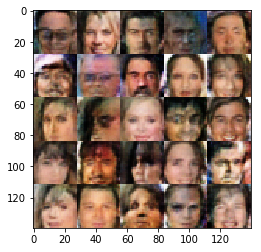

Epoch 1/1... Batch 2910... Discriminator Loss: 1.5421... Generator Loss: 0.5884
Epoch 1/1... Batch 2920... Discriminator Loss: 1.5161... Generator Loss: 0.7998
Epoch 1/1... Batch 2930... Discriminator Loss: 1.7235... Generator Loss: 0.3811
Epoch 1/1... Batch 2940... Discriminator Loss: 1.8421... Generator Loss: 0.2948
Epoch 1/1... Batch 2950... Discriminator Loss: 1.6393... Generator Loss: 0.4627
Epoch 1/1... Batch 2960... Discriminator Loss: 1.6956... Generator Loss: 0.3849
Epoch 1/1... Batch 2970... Discriminator Loss: 1.5916... Generator Loss: 0.5371
Epoch 1/1... Batch 2980... Discriminator Loss: 2.2732... Generator Loss: 0.2038
Epoch 1/1... Batch 2990... Discriminator Loss: 1.8357... Generator Loss: 0.3102
Epoch 1/1... Batch 3000... Discriminator Loss: 1.7472... Generator Loss: 0.3698


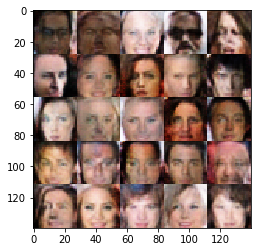

Epoch 1/1... Batch 3010... Discriminator Loss: 1.4690... Generator Loss: 0.9234
Epoch 1/1... Batch 3020... Discriminator Loss: 1.6361... Generator Loss: 0.5671
Epoch 1/1... Batch 3030... Discriminator Loss: 1.8026... Generator Loss: 0.3661
Epoch 1/1... Batch 3040... Discriminator Loss: 1.7767... Generator Loss: 0.3296
Epoch 1/1... Batch 3050... Discriminator Loss: 2.1586... Generator Loss: 0.2135
Epoch 1/1... Batch 3060... Discriminator Loss: 1.6487... Generator Loss: 0.7942
Epoch 1/1... Batch 3070... Discriminator Loss: 1.7764... Generator Loss: 0.3597
Epoch 1/1... Batch 3080... Discriminator Loss: 1.8335... Generator Loss: 0.3042
Epoch 1/1... Batch 3090... Discriminator Loss: 1.8407... Generator Loss: 0.3601
Epoch 1/1... Batch 3100... Discriminator Loss: 1.5701... Generator Loss: 0.4256


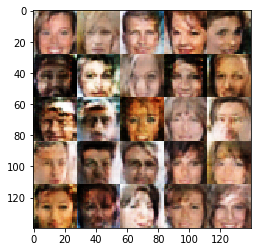

Epoch 1/1... Batch 3110... Discriminator Loss: 1.6770... Generator Loss: 0.3624
Epoch 1/1... Batch 3120... Discriminator Loss: 1.6849... Generator Loss: 0.3588
Epoch 1/1... Batch 3130... Discriminator Loss: 1.4093... Generator Loss: 0.9462
Epoch 1/1... Batch 3140... Discriminator Loss: 1.7959... Generator Loss: 0.3632
Epoch 1/1... Batch 3150... Discriminator Loss: 1.5567... Generator Loss: 0.5876
Epoch 1/1... Batch 3160... Discriminator Loss: 1.7150... Generator Loss: 0.4659


In [21]:
batch_size = 64
z_dim = 512
learning_rate = 0.0004
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.